In [1]:
import numpy as np #handling arrays, performing mathematical operations
import pandas as pd #for DataFrames and Series
import matplotlib.pyplot as plt #for plotting graphs
import seaborn as sns # data visualization
from scipy import stats #for statistical analysis
from sklearn.preprocessing import LabelEncoder #for encoding categorical data 
from sklearn.preprocessing import MinMaxScaler #for normalizing data
from sklearn.metrics import jaccard_score #for calculating Jaccard Similarity
from sklearn.preprocessing import StandardScaler #for standardizing data
from sklearn.metrics.pairwise import cosine_similarity #for calculating cosine similarity

In [2]:
def read(name,lname, sname):#function to read data from excel file and make a dataframe
    return pd.read_excel(name,index_col=0,usecols=lname,sheet_name=sname)

In [3]:
purchase_data = read("Lab Session Data.xlsx", [0,1,2,3,4],"Purchase data")#reading the excel and making a dataframe
col = purchase_data.columns # getting the column names
table1b = purchase_data.to_numpy() #converting the dataframe to a numpy array
A = purchase_data[[col[0],col[1],col[2]]].to_numpy() #getting the first three columns of the dataframe
C = purchase_data[col[3]].to_numpy() #getting the fourth column of the dataframe

print(purchase_data)
print(f"Dimension of data: {table1b.shape}")
print(f"Number of Vectors: {table1b.shape[0]}")
print(f"Rank of Matrix A: {np.linalg.matrix_rank(A)}")

X = np.linalg.pinv(A) @ C #calculating the solution of the system of linear equations from AX=C
print(f"Matrix X: {X}")



          Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)
Customer                                                           
C_1                20             6                 2           386
C_2                16             3                 6           289
C_3                27             6                 2           393
C_4                19             1                 2           110
C_5                24             4                 2           280
C_6                22             1                 5           167
C_7                15             4                 2           271
C_8                18             4                 2           274
C_9                21             1                 4           148
C_10               16             2                 4           198
Dimension of data: (10, 4)
Number of Vectors: 10
Rank of Matrix A: 3
Matrix X: [ 1. 55. 18.]


In [4]:
X = np.linalg.pinv(A) @ C #calculating the solution of the system of linear equations from AX=C
print(f"Matrix X: {X}") 

Matrix X: [ 1. 55. 18.]


In [5]:
label = [] #list to store the labels
def classify(payment): #function to classify the customers into rich or poor based on the payment
    if payment >= 200:
        label.append(1)
        return 'RICH'
    else:
        label.append(0) 
        return 'POOR'

classifier = np.vectorize(classify) #vectorizing the function to apply it to the entire array
customer = classifier(C) #applying the function to the payment column
purchase_data['class'] = customer #adding the class column to the dataframe
print(purchase_data) #printing the dataframe

label.pop(0) 
label = np.array(label) 
X_predict = np.linalg.pinv(A) @ label #calculating the solution of the system of linear equations from AX=C
print(f"Classfication Vector: {X_predict}")

          Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs) class
Customer                                                                 
C_1                20             6                 2           386  RICH
C_2                16             3                 6           289  RICH
C_3                27             6                 2           393  RICH
C_4                19             1                 2           110  POOR
C_5                24             4                 2           280  RICH
C_6                22             1                 5           167  POOR
C_7                15             4                 2           271  RICH
C_8                18             4                 2           274  RICH
C_9                21             1                 4           148  POOR
C_10               16             2                 4           198  POOR
Classfication Vector: [-0.0196597   0.26431172  0.04554979]


Mean: 1560.6634538152612
Variance: 58496.49239931613
Mean of stock price on Wednesday: 1550.7060000000001
Mean of stock price on Wednesday: False
Comparison: False
Mean of stock price in April 1698.9526315789474
Probability of making a loss over the stock: 0.4979919678714859
Probability of making a profit on Wednesday: 0.42
Probability of making a profit given that is a Wednesday: 0.42


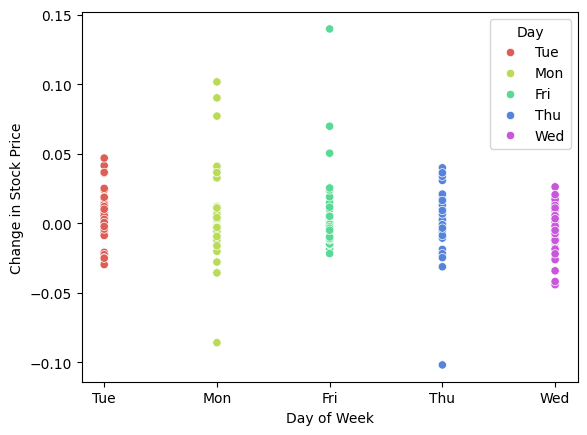

In [6]:
irctc_data = read("Lab Session Data.xlsx", [0,1,2,3,4,5,6,7,8],"IRCTC Stock Price") #reading the excel and making a dataframe
price = irctc_data['Price'].to_numpy()
population_mean = np.mean(price) #calculating the mean of the stock price
population_variance = np.var(price) #calculating the variance of the stock price
print(f"Mean: {population_mean}")
print(f"Variance: {population_variance}")

wednesday_mean = np.mean(irctc_data[irctc_data['Day'] == 'Wed']['Price'].to_numpy()) #calculating the mean of the stock price on Wednesday
print(f"Mean of stock price on Wednesday: {wednesday_mean}")
print(f"Mean of stock price on Wednesday: {population_mean == wednesday_mean}")
print(f"Comparison: {population_mean == wednesday_mean}")

april_mean = np.mean(irctc_data[irctc_data['Month'] == 'Apr']['Price'].to_numpy()) #calculating the mean of the stock price in April
print(f"Mean of stock price in April {april_mean}")

change = irctc_data['Chg%'].to_numpy() #getting the change in stock price
loss_change = irctc_data[irctc_data['Chg%']<0]['Chg%'].to_numpy() #getting the loss in stock price
probability_loss = len(loss_change)/len(change) #calculating the probability of making a loss
print(f"Probability of making a loss over the stock: {probability_loss}")

temp = irctc_data[irctc_data['Chg%']>0] #getting the profit in stock price
profit_change = temp[temp['Day'] == 'Wed']['Chg%'].to_numpy() #getting the profit on Wednesday
wednesday = irctc_data[irctc_data['Day'] == 'Wed']['Chg%'].to_numpy() #getting the stock price on Wednesday
probability_profit = len(profit_change)/len(wednesday) #calculating the probability of making a profit on Wednesday
print(f"Probability of making a profit on Wednesday: {probability_profit}")

print(f"Probability of making a profit given that is a Wednesday: {probability_profit}")

sns.scatterplot(x="Day", y="Chg%", data=irctc_data, hue="Day", palette="hls") #plotting the change in stock price on each day

plt.xlabel('Day of Week')
plt.ylabel('Change in Stock Price')
plt.show()



In [7]:
thyroid = read("Lab Session Data.xlsx","A:AE","thyroid0387_UCI") #reading the excel and making a dataframe
print(thyroid)
datatype = ["Numeric", "Nominal", "Nominal", "Nominal","Nominal","Nominal","Nominal","Nominal","Nominal","Nominal","Nominal","Nominal","Nominal","Nominal","Nominal","Nominal","Nominal", "Numeric", "Nominal", "Numeric", "Nominal", "Numeric", "Nominal", "Numeric","Nominal", "Numeric", "Nominal", "Numeric", "Nominal","Ordinal"] #list to store the data types of the attributes
i=0
for atr in thyroid.columns:
    print(f"Attribute {atr} is {datatype[i]}")
    i+=1

miss_count = {}
outliers={}
mean={}
var={}


           age sex on thyroxine query on thyroxine on antithyroid medication  \
Record ID                                                                      
840801013   29   F            f                  f                         f   
840801014   29   F            f                  f                         f   
840801042   41   F            f                  f                         f   
840803046   36   F            f                  f                         f   
840803047   32   F            f                  f                         f   
...        ...  ..          ...                ...                       ...   
870119022   56   M            f                  f                         f   
870119023   22   M            f                  f                         f   
870119025   69   M            f                  f                         f   
870119027   47   F            f                  f                         f   
870119035   31   M            f         

In [8]:
print("Range of numeric attributes")
for i,atr in enumerate(thyroid.columns):
    miss_count[atr]=np.count_nonzero([str(x) == '?' for x in thyroid[atr].to_numpy()]) #counting the missing values
    if datatype[i] == "Numeric": #checking if the attribute is numeric
        thyroid[atr] = pd.to_numeric(thyroid[atr], errors='coerce') #converting the attribute to numeric
        print(f'{atr} -> {thyroid[atr].min()}-{thyroid[atr].max()}') 
        z_score = np.abs(stats.zscore(thyroid[atr].dropna())) #calculating the z-score
        outlier_indices = np.where(z_score>3)[0] #getting the indices of the outliers
        outliers[atr]= len(outlier_indices) #counting the number of outliers
        mean[atr]= thyroid[atr].mean() #calculating the mean
        var[atr]= thyroid[atr].var() #calculating the variance
        

Range of numeric attributes
age -> 1-65526
TSH -> 0.005-530.0
T3 -> 0.05-18.0
TT4 -> 2.0-600.0
T4U -> 0.17-2.33
FTI -> 1.4-881.0
TBG -> 0.1-200.0


In [9]:
print("Missing Values")
for i in miss_count:
    print(f'{i} -> {miss_count[i]}')

Missing Values
age -> 0
sex -> 307
on thyroxine -> 0
query on thyroxine -> 0
on antithyroid medication -> 0
sick -> 0
pregnant -> 0
thyroid surgery -> 0
I131 treatment -> 0
query hypothyroid -> 0
query hyperthyroid -> 0
lithium -> 0
goitre -> 0
tumor -> 0
hypopituitary -> 0
psych -> 0
TSH measured -> 0
TSH -> 842
T3 measured -> 0
T3 -> 2604
TT4 measured -> 0
TT4 -> 442
T4U measured -> 0
T4U -> 809
FTI measured -> 0
FTI -> 802
TBG measured -> 0
TBG -> 8823
referral source -> 0
Condition -> 0


In [10]:
print("Outliers")
for i in outliers:
    print(f'{i} -> {outliers[i]}')

Outliers
age -> 3
TSH -> 100
T3 -> 86
TT4 -> 101
T4U -> 172
FTI -> 95
TBG -> 11


In [11]:
print("Mean and Variance")
for i in mean:
    print(i + " : Mean: " + str(mean[i]) + " Variance: " + str(var[i]))

Mean and Variance
age : Mean: 73.55582206716092 Variance: 1401800.868871345
TSH : Mean: 5.218402753781513 Variance: 584.8661532092907
T3 : Mean: 1.970628805724726 Variance: 0.7877961683561557
TT4 : Mean: 108.70030469644902 Variance: 1407.950791475485
T4U : Mean: 0.9760557216309935 Variance: 0.04014430639006457
FTI : Mean: 113.64074551935484 Variance: 1726.5395850611546
TBG : Mean: 29.87005729512894 Variance: 444.3876429994665


In [12]:
for i,atr in enumerate(thyroid.columns):
    if datatype[i] == "Numeric": #checking if the attribute is numeric
        if outliers[atr] > 0: #checking if there are outliers
            thyroid[atr] = thyroid[atr].fillna(thyroid[atr].median()) #filling the missing values with the median
        else: 
            thyroid[atr] = thyroid[atr].fillna(mean[atr]) #filling the missing values with the mean
    else:
        thyroid[atr] = thyroid[atr].replace(to_replace = '?', value = thyroid[atr].mode()[0]) #replacing the missing values with the mode, if categorical
print(thyroid)

           age sex on thyroxine query on thyroxine on antithyroid medication  \
Record ID                                                                      
840801013   29   F            f                  f                         f   
840801014   29   F            f                  f                         f   
840801042   41   F            f                  f                         f   
840803046   36   F            f                  f                         f   
840803047   32   F            f                  f                         f   
...        ...  ..          ...                ...                       ...   
870119022   56   M            f                  f                         f   
870119023   22   M            f                  f                         f   
870119025   69   M            f                  f                         f   
870119027   47   F            f                  f                         f   
870119035   31   M            f         

In [13]:
le = LabelEncoder() #creating a label encoder
scaler = MinMaxScaler() #creating a min-max scaler


for i,atr in enumerate(thyroid.columns):
    if datatype[i] == "Nominal" or datatype[i] == "Ordinal": #checking if the attribute is nominal or ordinal
        thyroid[atr] = le.fit_transform(thyroid[atr]) #encoding the attribute
    else:
        thyroid[atr] = scaler.fit_transform(thyroid[atr].values.reshape(-1,1)) #normalizing the attribute

print(thyroid)

                age  sex  on thyroxine  query on thyroxine  \
Record ID                                                    
840801013  0.000427    0             0                   0   
840801014  0.000427    0             0                   0   
840801042  0.000610    0             0                   0   
840803046  0.000534    0             0                   0   
840803047  0.000473    0             0                   0   
...             ...  ...           ...                 ...   
870119022  0.000839    1             0                   0   
870119023  0.000320    1             0                   0   
870119025  0.001038    1             0                   0   
870119027  0.000702    0             0                   0   
870119035  0.000458    1             0                   0   

           on antithyroid medication  sick  pregnant  thyroid surgery  \
Record ID                                                               
840801013                          0     0     

In [14]:
'''Jaccard Similarity'''

thyroid = thyroid.reset_index(drop=True) #resetting the index of the dataframe

binary_attributes = ['on thyroxine', 'query on thyroxine', 'on antithyroid medication',
                     'sick', 'pregnant', 'thyroid surgery', 'I131 treatment',
                     'query hypothyroid', 'query hyperthyroid', 'lithium',
                     'goitre', 'tumor', 'hypopituitary', 'psych',
                     'TSH measured', 'T3 measured', 'TT4 measured',
                     'T4U measured', 'FTI measured', 'TBG measured']
vector1 = thyroid.loc[0, binary_attributes].values #getting the binary attributes of the first row
vector2 = thyroid.loc[1, binary_attributes].values #getting the binary attributes of the second row

print(vector1)

js = jaccard_score(vector1, vector2) #calculating the Jaccard Similarity
smc = sum(vector1 == vector2) / len(vector1) #calculating the Simple Matching Coefficient

print(f"Jaccard Coefficient (JC): {js}")
print(f"Simple Matching Coefficient (SMC): {smc}")

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Jaccard Coefficient (JC): 0.25
Simple Matching Coefficient (SMC): 0.85


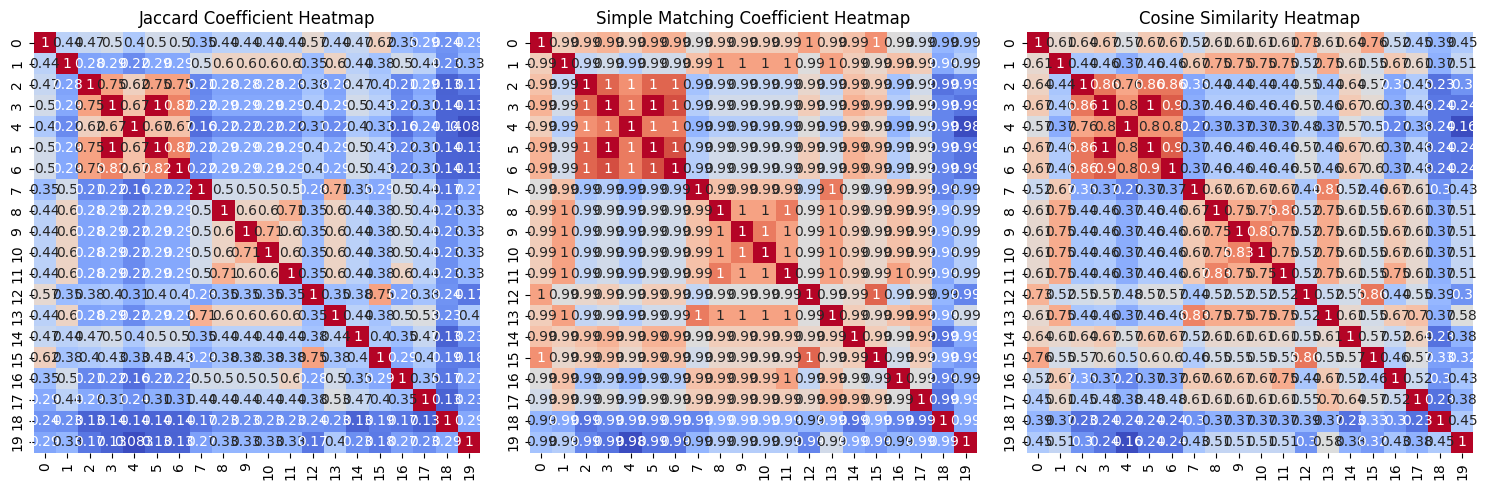

In [15]:

thyroid = read("Lab Session Data.xlsx", "A:AE", "thyroid0387_UCI")
numeric_cols = thyroid.select_dtypes(include=['float64', 'int64']).columns #getting the numeric columns
scaler = StandardScaler() #creating a standard scaler
thyroid[numeric_cols] = scaler.fit_transform(thyroid[numeric_cols]) #standardizing the numeric columns
thy_binary = pd.get_dummies(thyroid, drop_first=True) # one hot encoding 
df_20 = thy_binary.iloc[:20] #getting the first 20 rows


jc_matrix = np.zeros((20, 20)) #creating a matrix to store the Jaccard Coefficients
smc_matrix = np.zeros((20, 20)) #creating a matrix to store the Simple Matching Coefficients
cosine_matrix = np.zeros((20, 20)) #creating a matrix to store the Cosine Similarities
vec1 = df_20.iloc[0] #getting the first vector
vec2 = df_20.iloc[1] #getting the second vector

for i in range(20): 
    for j in range(20):
        vec1 = df_20.iloc[i] #getting the first vector
        vec2 = df_20.iloc[j] #getting the second vector
        
        f11 = sum((vec1 == 1) & (vec2 == 1)) #when both the values are 1
        f10 = sum((vec1 == 1) & (vec2 == 0)) #when the first value is 1 and the second value is 0
        f01 = sum((vec1 == 0) & (vec2 == 1)) #when the first value is 0 and the second value is 1
        f00 = sum((vec1 == 0) & (vec2 == 0)) #when both the values are 0
        
        jc_matrix[i, j] = f11 / (f11 + f10 + f01) #calculating the Jaccard Coefficient
        smc_matrix[i, j] = (f11 + f00) / (f11 + f10 + f01 + f00) #calculating the Simple Matching Coefficient
        cosine_matrix[i, j] = cosine_similarity([vec1], [vec2])[0][0] #calculating the Cosine Similarity

# Plot heatmaps
plt.figure(figsize=(15, 5)) #setting the figure size

plt.subplot(1, 3, 1) #creating the first subplot
sns.heatmap(jc_matrix, annot=True, cmap='coolwarm', cbar=False) #plotting the heatmap
plt.title('Jaccard Coefficient Heatmap')

plt.subplot(1, 3, 2)
sns.heatmap(smc_matrix, annot=True, cmap='coolwarm', cbar=False) #plotting the heatmap
plt.title('Simple Matching Coefficient Heatmap')

plt.subplot(1, 3, 3)
sns.heatmap(cosine_matrix, annot=True, cmap='coolwarm', cbar=False) #plotting the heatmap
plt.title('Cosine Similarity Heatmap')

plt.tight_layout()
plt.show()